In [1]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [2]:
data=pl.read_csv("./Customer-Churn.csv")
print(data.shape)
data.head()

(7043, 21)


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes"""


## PreSplitting

In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data= train_test_split(data,test_size=0.2,random_state=42,stratify=data[["Churn","tenure"]],shuffle=True)  # Holdout set
train_data.shape,test_data.shape

((5634, 21), (1409, 21))

In [4]:
train_data.describe()

statistic,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,str,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""count""","""5634""","""5634""",5634.0,"""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""",5634.0,5625.0,"""5634"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,9.0,"""0"""
"""mean""",null,null,0.163294,null,null,32.388889,null,null,null,null,null,null,null,null,null,null,null,null,65.07035,2296.754436,null
"""std""",null,null,0.369667,null,null,24.561096,null,null,null,null,null,null,null,null,null,null,null,null,30.026572,2273.961342,null
"""min""","""0003-MKNFE""","""Female""",0.0,"""No""","""No""",0.0,"""No""","""No""","""DSL""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""No""","""Bank transfer (automatic)""",18.25,18.8,"""No"""
"""25%""",null,null,0.0,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,36.25,401.5,null
"""50%""",null,null,0.0,null,null,29.0,null,null,null,null,null,null,null,null,null,null,null,null,70.5,1406.0,null
"""75%""",null,null,0.0,null,null,55.0,null,null,null,null,null,null,null,null,null,null,null,null,89.95,3810.8,null
"""max""","""9995-HOTOH""","""Male""",1.0,"""Yes""","""Yes""",72.0,"""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two year""","""Yes""","""Mailed check""",118.65,8684.8,"""Yes"""


# Dealing with null values

In [5]:
train_data.filter((train_data["TotalCharges"].is_null()))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7644-OMVMY""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",19.85,null,"""No"""
"""2775-SEFEE""","""Male""",0,"""No""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""Yes""","""Yes""","""No""","""Yes""","""No""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",61.9,null,"""No"""
"""4472-LVYGI""","""Female""",0,"""Yes""","""Yes""",0,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",52.55,null,"""No"""
"""5709-LVOEQ""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Two year""","""No""","""Mailed check""",80.85,null,"""No"""
"""4367-NUYAO""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",25.75,null,"""No"""
"""1371-DWPAZ""","""Female""",0,"""Yes""","""Yes""",0,"""No""","""No phone service""","""DSL""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Credit card (automatic)""",56.05,null,"""No"""
"""2923-ARZLG""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""One year""","""Yes""","""Mailed check""",19.7,null,"""No"""
"""2520-SGTTA""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",20.0,null,"""No"""
"""4075-WKNIU""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Mailed check""",73.35,null,"""No"""


Very few observations dropping them ratherthan imputing.Model cant learn with 9 observations during cv

In [6]:
train_data=train_data.filter(~(train_data["TotalCharges"].is_null()))
test_data=test_data.filter(~(test_data["TotalCharges"].is_null()))

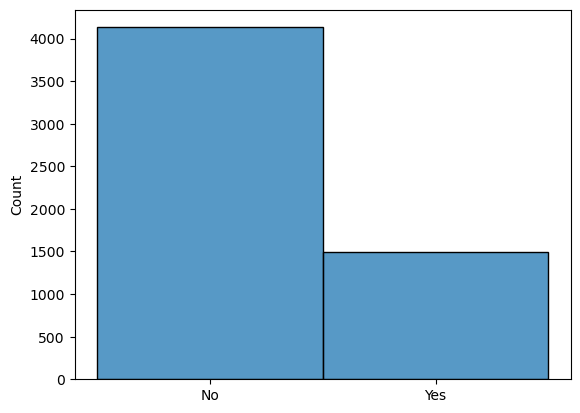

In [7]:
sns.histplot(train_data["Churn"])
plt.show()

# Imbalanced dataSet

Casting yes as 1 and No as 0

In [8]:
train_data=train_data.with_columns(train_data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Int8))
test_data=test_data.with_columns(test_data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Int8))

In [9]:
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

getting unique columns

In [10]:
train_data=train_data.unique(maintain_order=True,subset=train_data[:,1:].columns) #subset dropping customerid
test_data=test_data.unique(maintain_order=True,subset=test_data[:,1:].columns)

# Categorical EDA

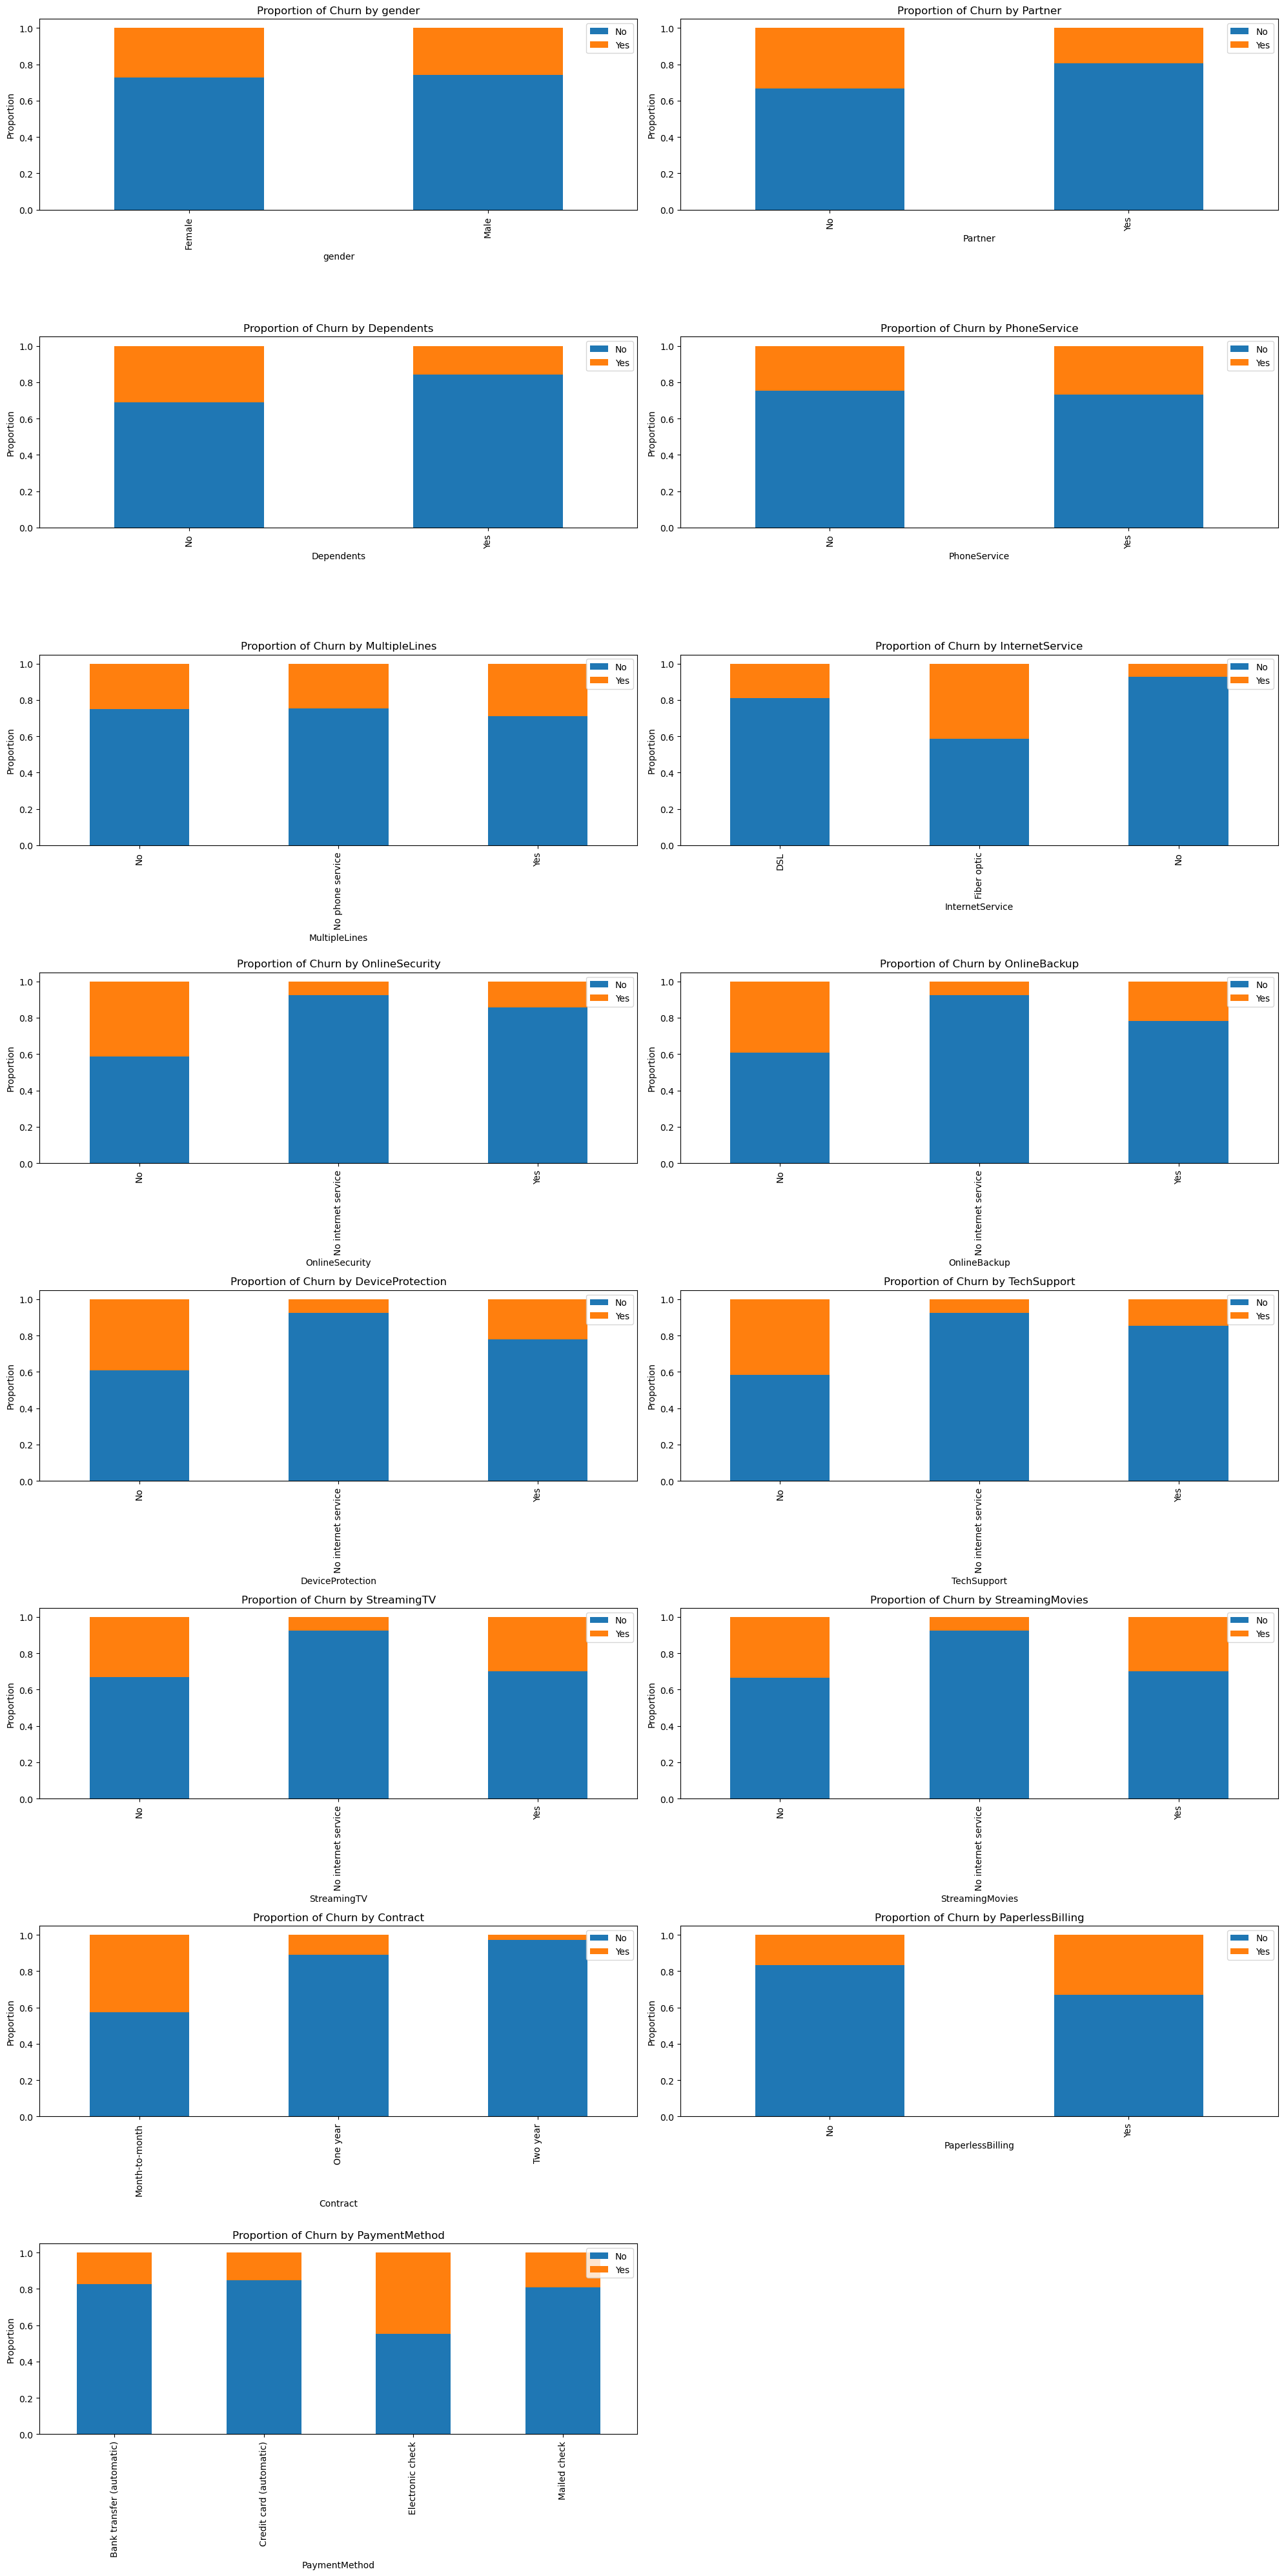

In [11]:
cat_proportion_plot(train_data,cat_cols,"Churn")

More likely to churn
- Having partners,Dependents
- Customers with No (OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport)
- FiberOptic Consumers
- Month-to-Month contracts
- Paperless billing
- Electronic Check payments

In [12]:
perform_non_normal_kruskal_hypothesis(train_data,cat_cols,"Churn")

Kruskal-Wallis H-statistic: 1.0455524417032696 P-value: 0.3065336277094252
There is no significant difference in Churn between different gender categories.

Kruskal-Wallis H-statistic: 135.9511166696924 P-value: 2.045036245308761e-31
There is a significant difference in Churn between different Partner categories.

Kruskal-Wallis H-statistic: 136.96117706258627 P-value: 1.2296586554505942e-31
There is a significant difference in Churn between different Dependents categories.

Kruskal-Wallis H-statistic: 1.10945410492557 P-value: 0.2922006447836433
There is no significant difference in Churn between different PhoneService categories.

Kruskal-Wallis H-statistic: 11.091912100683393 P-value: 0.0039032097545810816
There is a significant difference in Churn between different MultipleLines categories.

Kruskal-Wallis H-statistic: 556.3593796293309 P-value: 1.5420403430610444e-121
There is a significant difference in Churn between different InternetService categories.

Kruskal-Wallis H-statist

# Similar results from hypothesis tests except : it shows few more features are significant:
- Streaming Tv
- Streaming Movies

In [13]:
train_data=train_data.drop("PhoneService","gender")
test_data=test_data.drop("PhoneService","gender")
cat_cols.remove("PhoneService")
cat_cols.remove("gender")

marking count of more churning categories to 1 for experimenting Logical gates based feature engineering

In [14]:
for col in ['Partner','Dependents','PaperlessBilling']:
    train_data=train_data.with_columns(train_data[col].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))
    test_data=test_data.with_columns(test_data[col].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))

In [15]:
train_data=train_data.with_columns(train_data['MultipleLines'].replace("No phone service","No"))
train_data=train_data.with_columns(train_data['InternetService'].str.replace_many(["Fiber optic","DSL","No"],["0","1","2"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data['Contract'].str.replace_many(["Month-to-month","One year","Two year"],["1","12","24"]).cast(pl.Int8))

test_data=test_data.with_columns(test_data['MultipleLines'].replace("No phone service","No"))
test_data=test_data.with_columns(test_data['InternetService'].str.replace_many(["Fiber optic","DSL","No"],["0","1","2"]).cast(pl.Int8))
test_data=test_data.with_columns(test_data['Contract'].str.replace_many(["Month-to-month","One year","Two year"],["1","12","24"]).cast(pl.Int8))

cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
modified_cols = ['MultipleLines',"InternetService",'Contract']

In [16]:
for col in cat_cols:
    train_data=train_data.with_columns(train_data[col].str.replace("No internet service","No"))
    test_data=test_data.with_columns(test_data[col].str.replace("No internet service","No"))

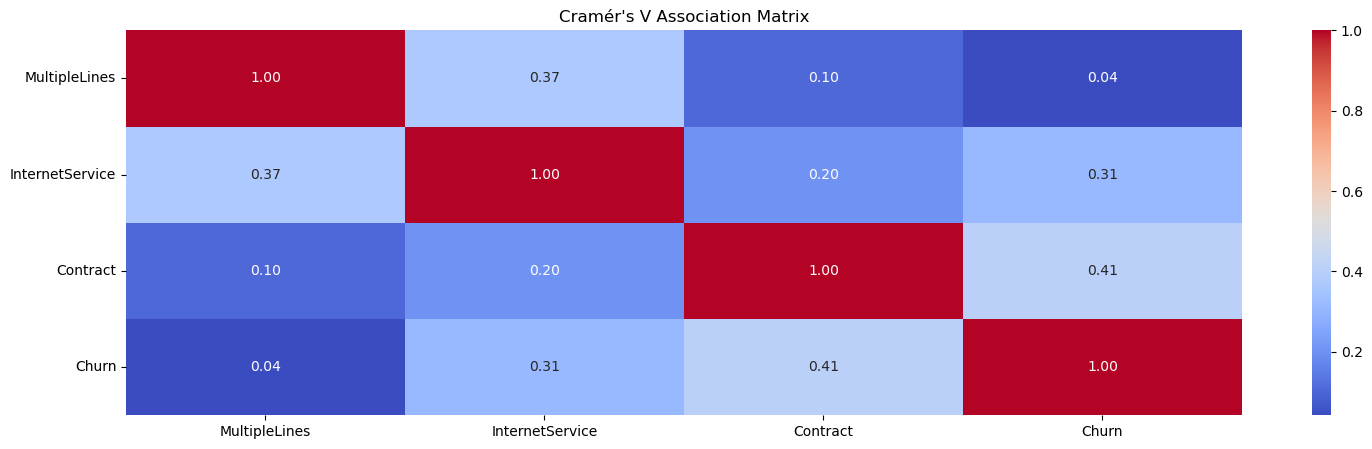

In [17]:
plot_Association_heatmap(train_data,columns=modified_cols+["Churn"])

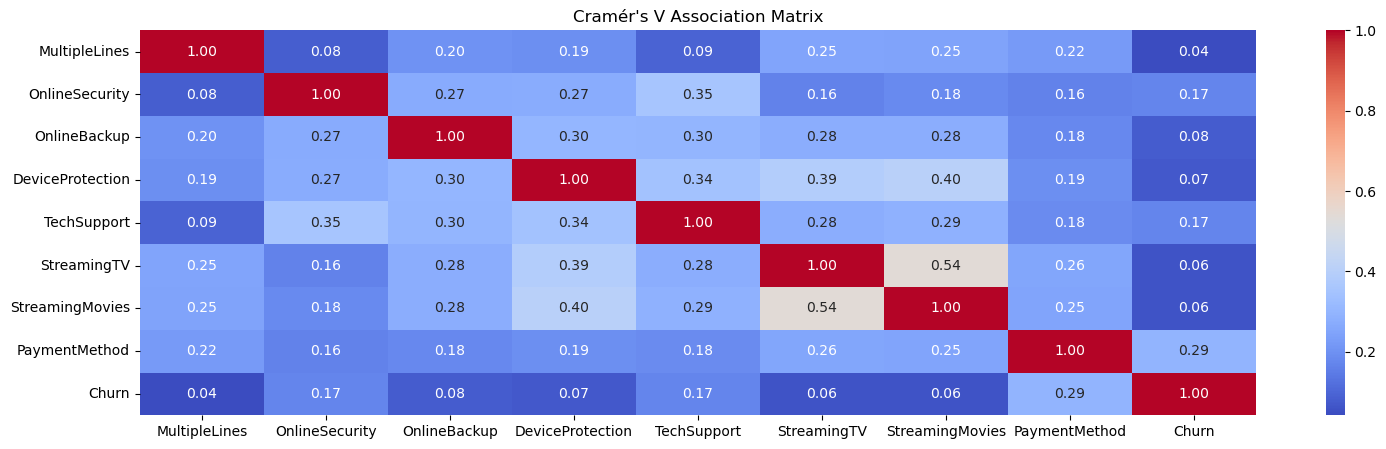

In [18]:
plot_Association_heatmap(train_data,cat_cols+["Churn"])

No high associations

# Numerical EDA

### Univariate Analysis

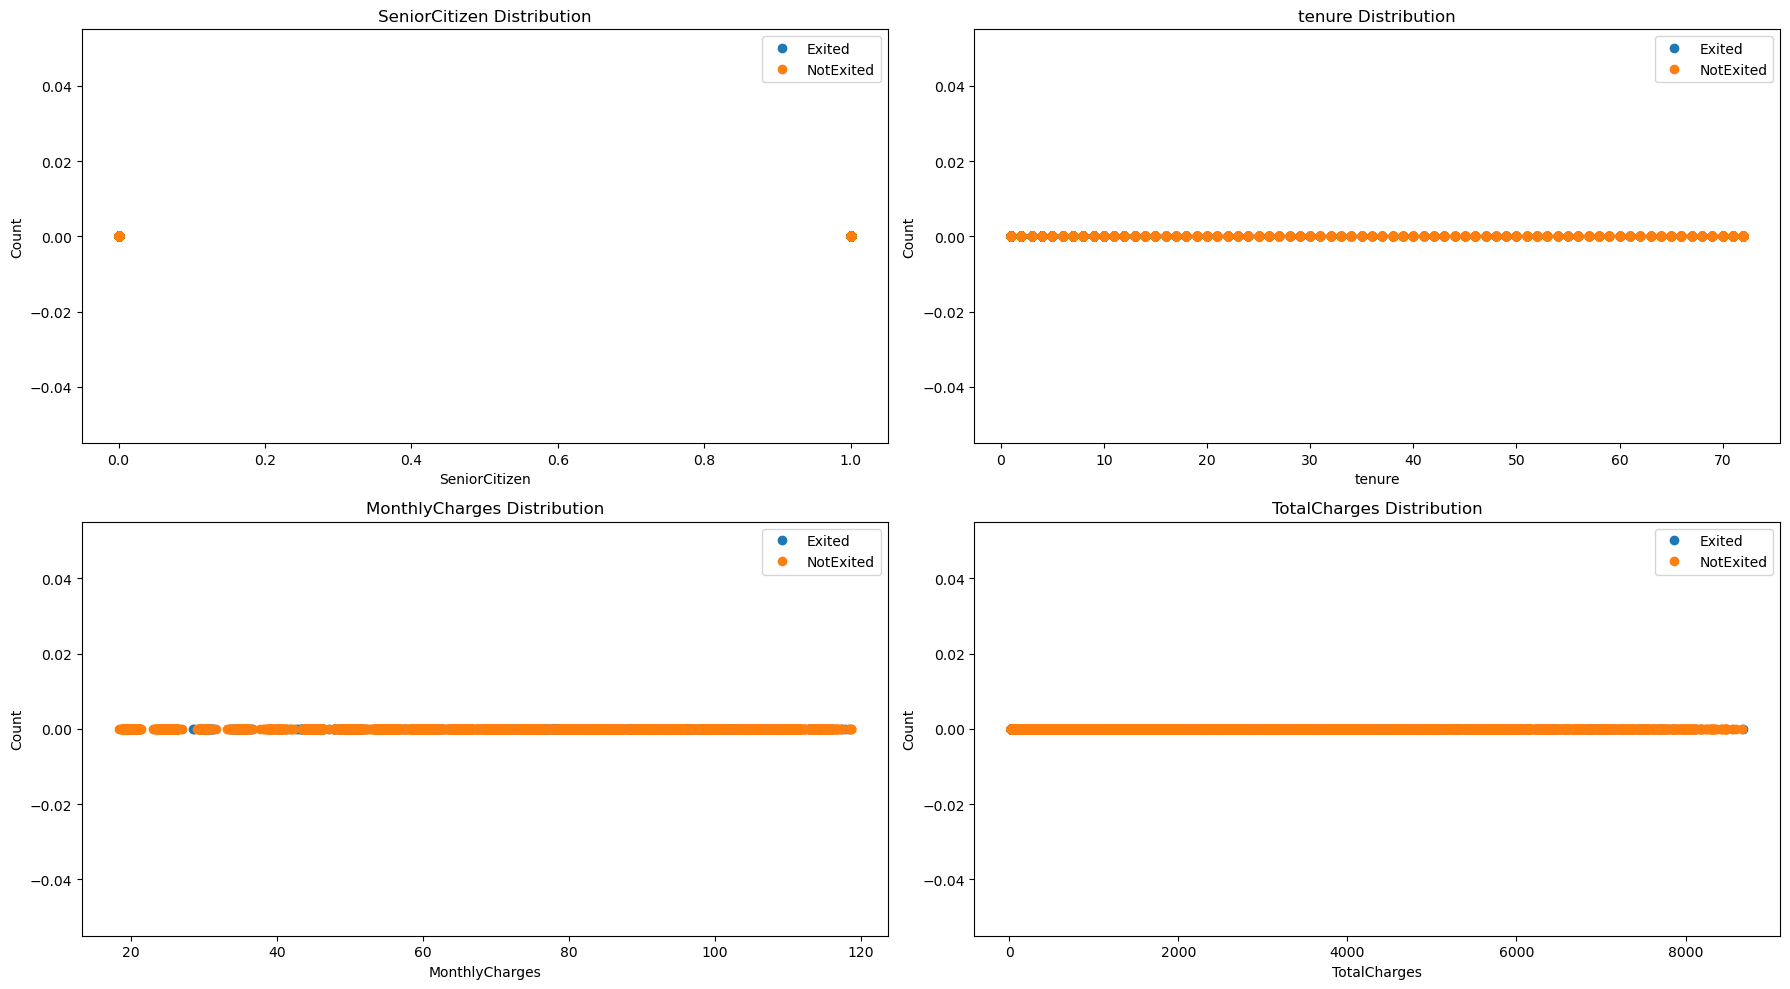

In [19]:
df_Churn = train_data.filter(train_data['Churn']==1)
df_notChurn = train_data.filter(train_data['Churn']==0)
univariavte_lineplots(df_Churn, df_notChurn, num_cols)

Data is not liner separable by single feature

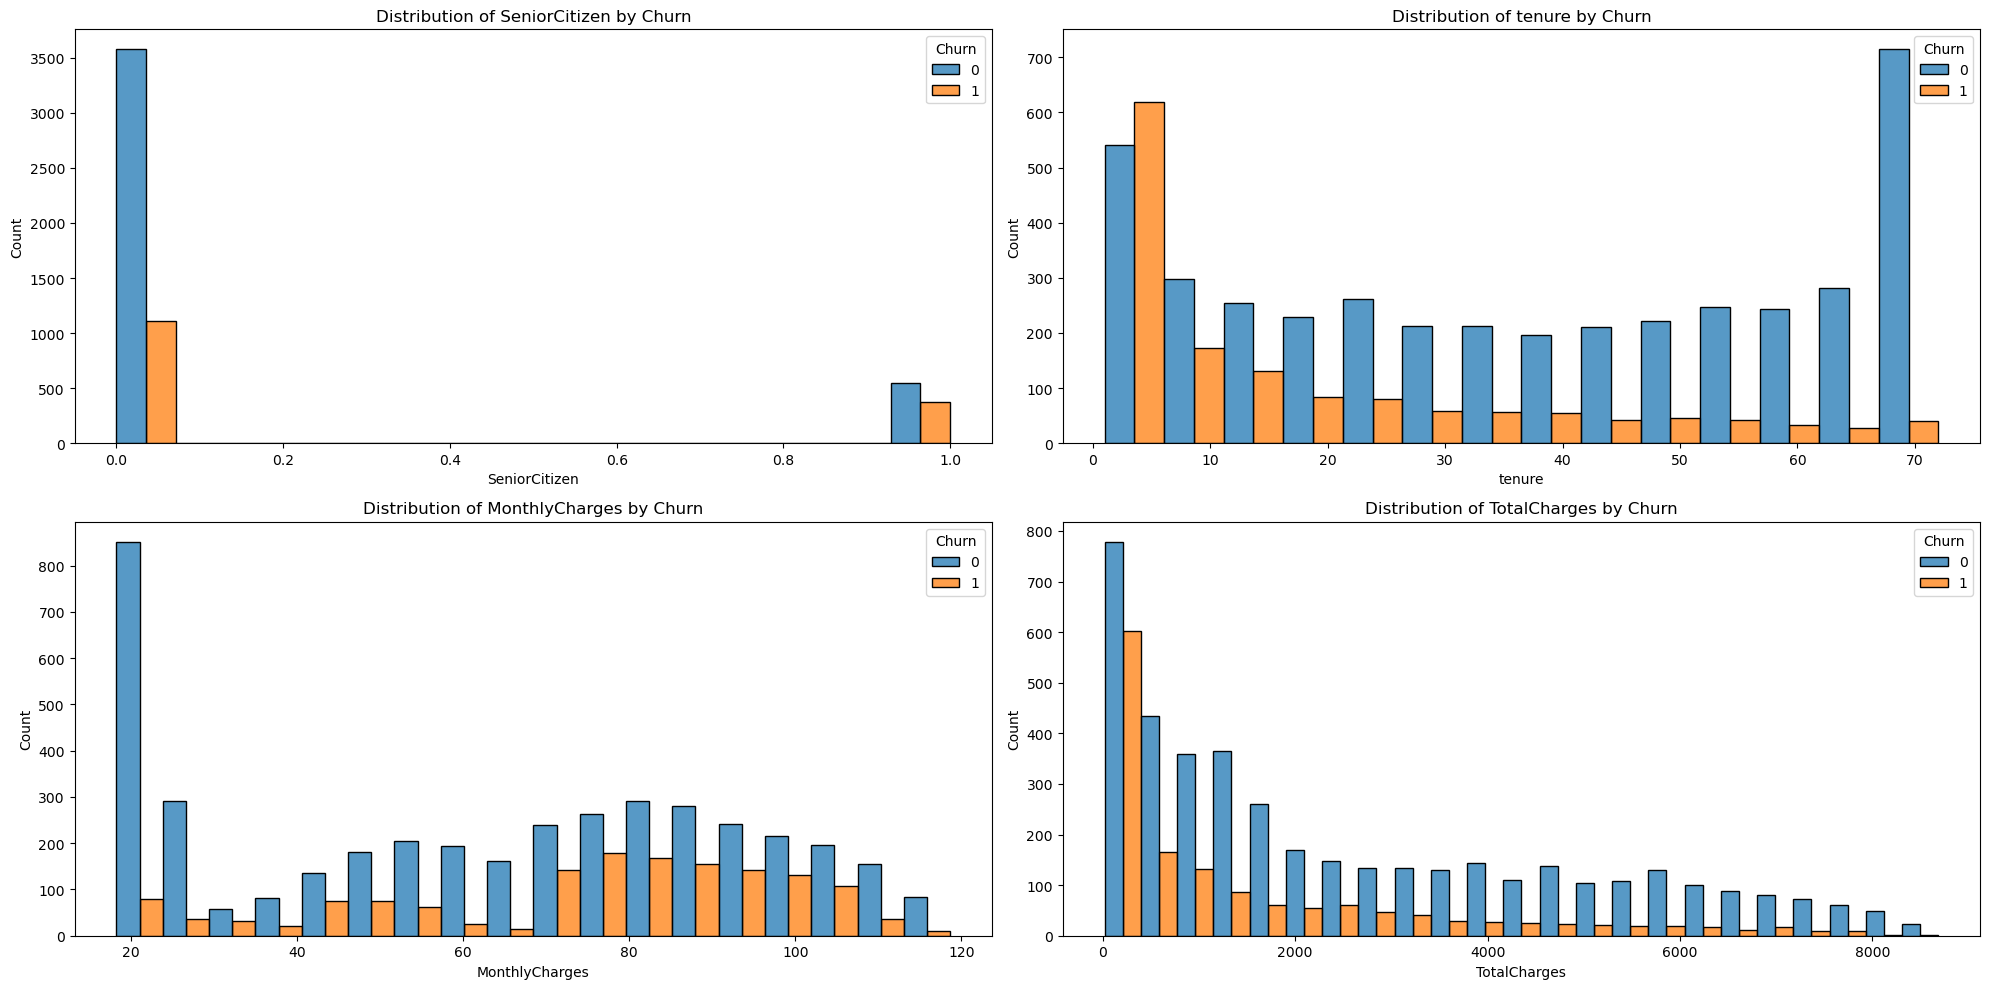

In [20]:
num_dodge_plot(train_data,num_cols,"Churn")

Less tenure or new people are more likely to Churn

## Bivariate Analysis

<Axes: >

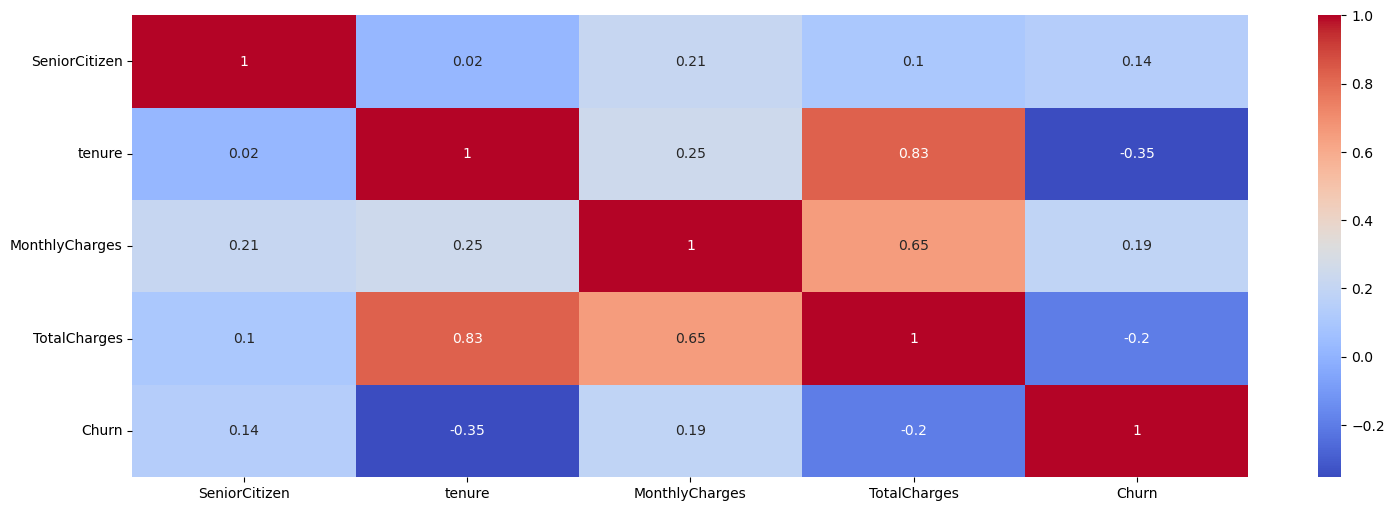

In [21]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols+["Churn"]].to_pandas().corr(),annot=True,cmap="coolwarm")

NO very high multicollinear

In [22]:
train_data.write_csv("../Day2_Naive_Modeling/train_data.csv")
test_data.write_csv("../Day2_Naive_Modeling/test_data.csv")
train_data.write_csv("../Day3_FeatureEngineering/train_data.csv")
test_data.write_csv("../Day3_FeatureEngineering/test_data.csv")

Base model

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
 
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

X_train=train_data.drop("customerID","Churn").to_pandas()
y_train=train_data["Churn"].to_pandas()
X_test=test_data.drop("customerID","Churn").to_pandas()
y_test=test_data["Churn"].to_pandas()

transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)

pipe = Pipeline(
    [
        ("tranformer", transformer),
        ("classifier", LogisticRegression()),
    ]
)
pipe

Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaymentMethod']),
                                                 ('scaler', StandardScaler(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', LogisticRegression())])

In [24]:
from sklearn.model_selection import cross_validate,RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=10,random_state=42)

cv_results = cross_validate(pipe, X_train,y_train, cv=rskf, scoring=['recall','roc_auc'],n_jobs=-1,return_train_score=True,error_score="raise")
print(f'Mean Train roc auc Score: {cv_results["train_roc_auc"].mean()}')
print(f'Mean Train recall Score: \033[1m{cv_results["train_recall"].mean()}\033[0m\n')

print(f'Mean Test roc auc Score: {cv_results["test_roc_auc"].mean()}')
print(f'Mean Test recall Score: \033[1m{cv_results["test_recall"].mean()}\033[0m')


Mean Train roc auc Score: 0.846999776114445
Mean Train recall Score: 0.5505006020439308

Mean Test roc auc Score: 0.8438610076133888
Mean Test recall Score: 0.5461713223290405


Recall score: 0.56
Correlation : 0.4789579570825273
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1031
           1       0.66      0.56      0.60       375

    accuracy                           0.81      1406
   macro avg       0.75      0.73      0.74      1406
weighted avg       0.80      0.81      0.80      1406



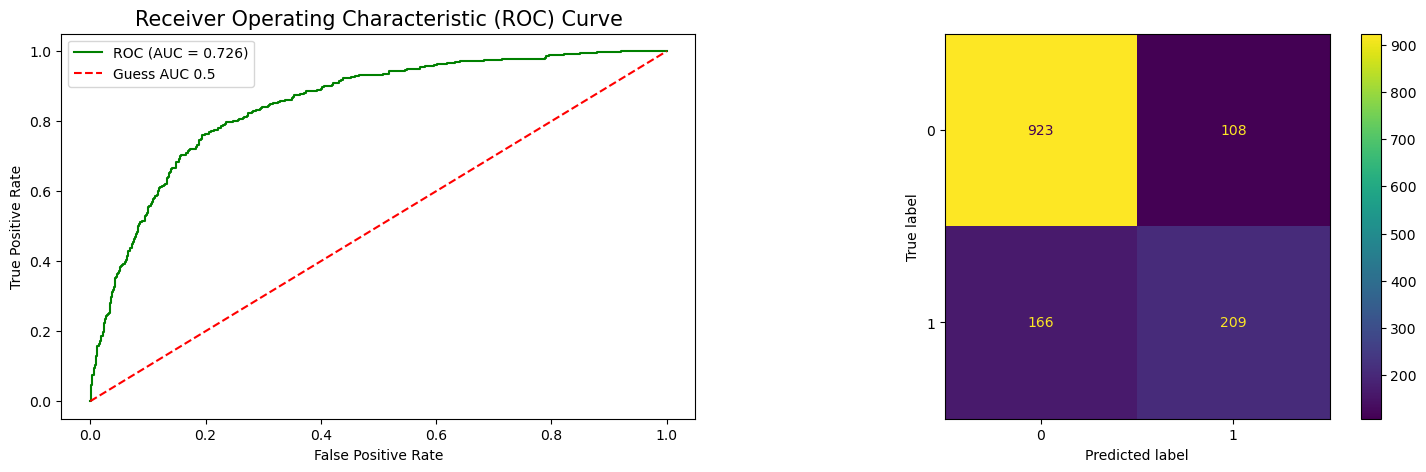

In [25]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,recall_score
from sklearn.model_selection import cross_val_predict
# Evaluation
predictions_prob= cross_val_predict(pipe,X_test,y_test,method='predict_proba',n_jobs=-1)
predictions=[0 if x < 0.5 else 1 for x in predictions_prob[:,1]]
roc_auc = roc_auc_score(y_test, predictions)
recall = recall_score(y_test,predictions)
coef = matthews_corrcoef(y_test,predictions)
print(f"\033[1mRecall score: {recall:.2f}\033[0m")
print(f"Correlation : {coef}")
print("\033[4mClassification Report\033[0m \n",classification_report(y_test,predictions))
fpr, tpr, thresholds=roc_curve(y_test,predictions_prob[:,1])
plot_evaluation(fpr, tpr,y_test,predictions,roc_auc)

56% churners are identified with 66% 